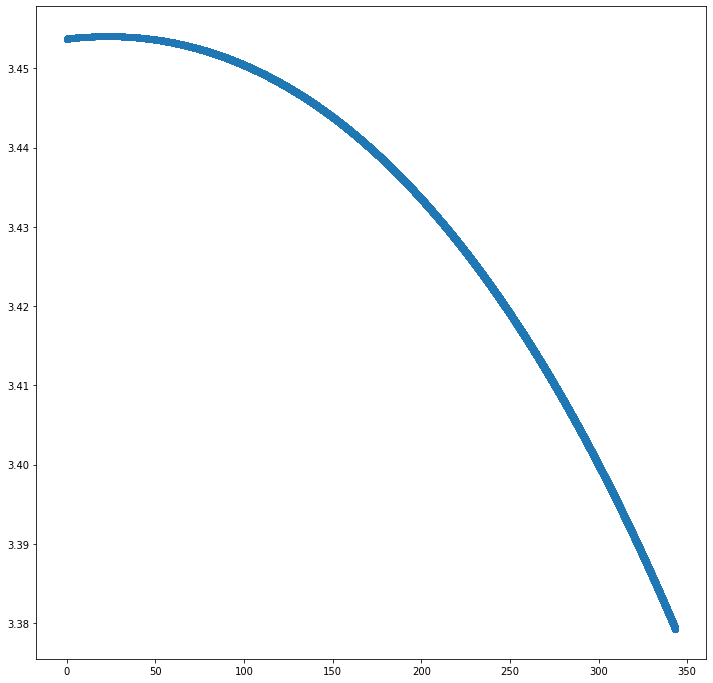

In [33]:
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import math

data = pd.read_csv('OrbitalDATA.txt', delim_whitespace=True)

dopplerFreqSamples = data['DopplerShift[Hz]'].dropna().to_numpy()
SamplingPeriod = 0.01


SampleTime = (np.asarray(range(0,len(dopplerFreqSamples))))*SamplingPeriod

plt.figure(figsize=(12, 12))
plt.scatter(SampleTime, dopplerFreqSamples)


In [32]:
def sinf(x, A, nu):
    return A * np.cos(nu * x) # sine function with amplitude A and angular frequency


parameters:
 [3.45667262e+00 6.01829685e-04]
covariance matrix:
 [[1.64995847e-10 1.11316112e-12]
 [1.11316112e-12 1.36522554e-14]]
A = 3.46 +- 0.00
f = 0.00 +- 0.00
140741804
[3.45667262 3.45667262 3.45667262 ... 3.3831232  3.38311893 3.38311466]


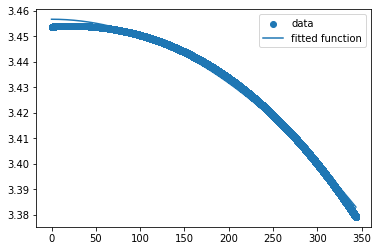

In [31]:
popt, pcov = optimize.curve_fit(sinf, SampleTime, dopplerFreqSamples, p0=[3, 0.00001], full_output=False)
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("f = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))

InterpSamplingPeriod = 2.44E-6
InterpSampledDataLength = math.ceil(len(dopplerFreqSamples)*(SamplingPeriod/InterpSamplingPeriod))

print(InterpSampledDataLength)

InterSampleTime = (np.asarray(range(0,InterpSampledDataLength)))*InterpSamplingPeriod

plt.figure(figsize=(12, 12))
plt.scatter(SampleTime, dopplerFreqSamples, label='data')
plt.plot(InterSampleTime, sinf(InterSampleTime, popt[0], popt[1]), label='fitted function')
plt.legend(loc='best')

print(sinf(SampleTime, popt[0], popt[1]))

In [ ]:
def dopplerInterpolation(dopplerSamples, samplesFreq, numberOfPackets, interpSamplesFreq):

    InterSampleTime = (np.asarray(range(0,InterpSampledDataLength)))*InterpSamplingPeriod

    popt, pcov = optimize.curve_fit(f, SampleTime, y_data, p0=[2, 2], full_output=False)
    print("parameters:\n", popt)
    print("covariance matrix:\n", pcov)
    print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
    print("f = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
    return 1